In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from a string or file
# Since you provided it as text, I'll assume it's saved as 'titanic_data.csv'
data = pd.read_csv('titanic_data.csv')

In [3]:
# Step 1: Data Exploration
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327

In [4]:
# Step 2: Data Preprocessing
# Drop columns that won't be used
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing Age with median
data['Fare'].fillna(data['Fare'].median(), inplace=True)  # Fill missing Fare with median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill Embarked with mode

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Male: 1, Female: 0
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])  # S: 2, C: 0, Q: 1

In [5]:
# Step 3: Feature and Target Separation
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target

# Normalize numerical data
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

In [6]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Train the Model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [9]:
# Step 7: Feature Importance Visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

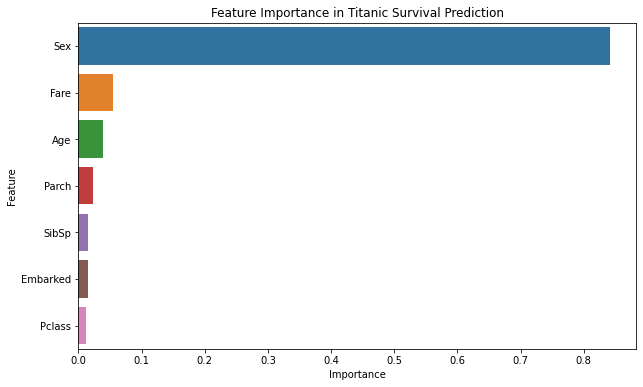

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Titanic Survival Prediction')
plt.savefig('feature_importance.png')  # Save plot for README
plt.show()

In [11]:
# Save the model
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']